In [42]:
#import the csv module, a little code toolkit for working with spreadsheet-style data files
import csv
import numpy as np 
import matplotlib.pyplot as plt 

In [43]:
#prepares and opens datasets 
def prepare_datasets(file_path):
    """ 
    Accepts: path to a tab-separated plaintext file
    Returns: a list containing a dictionary for every row in the file, 
        with the file column headers as keys
    """
    
    with open(file_path) as infile:
        reader = csv.DictReader(infile, delimiter=',')
        list_of_dicts = [dict(r) for r in reader]
        
    return list_of_dicts

darkpattern = prepare_datasets("dark-patterns-v2 .csv")

In [90]:
#Check/test the pattern category prints
categories = set()
for entry in darkpattern:
    categories.add(entry["Pattern Category"])
print(categories)

{'Obstruction', 'Forced Action', 'Sneaking', 'Social Proof', 'Urgency', 'Misdirection', 'Scarcity'}


In [95]:
#this fucntion analyzes each category from above and checks and counts whether it's deceptive
# or not deceptive. It then adds and saves the count to graph each category
def analyze_category(category):
    deceptive_count = 0
    non_deceptive_count = 0

    for entry in darkpattern:
        if entry["Pattern Category"] == category:
            if entry["Deceptive?"] == 'Yes':
                deceptive_count+=1
            elif entry["Deceptive?"] == "No":
                non_deceptive_count+=1
                
    x_categories = ["Yes", "No"]
    y_counts = [deceptive_count, non_deceptive_count]
    
    plt.bar(x_categories, y_counts, width=0.4, color=["blue", "red"])
    plt.ylabel("Counts")
    plt.xlabel("Deceptive?")
    plt.title(category)
    plt.show()
    
    return deceptive_count, non_deceptive_count

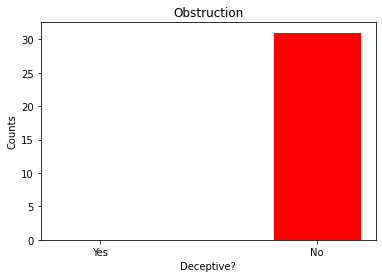

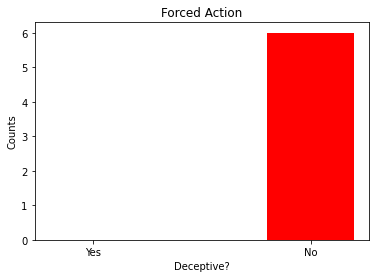

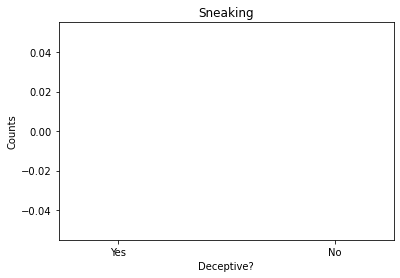

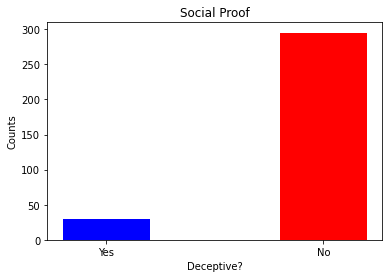

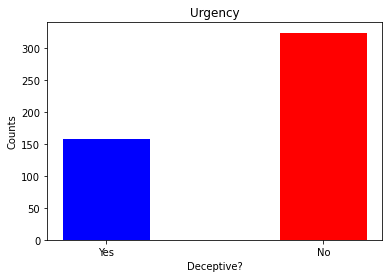

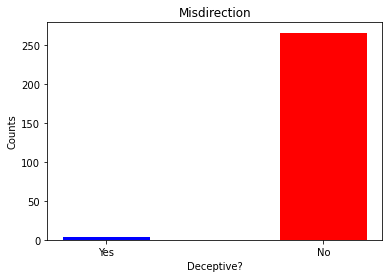

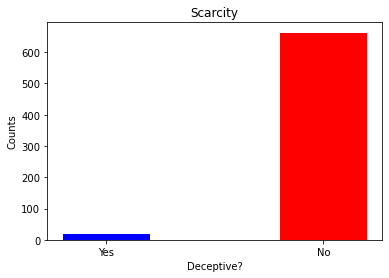

['Obstruction', 'Forced Action', 'Sneaking', 'Social Proof', 'Urgency', 'Misdirection', 'Scarcity'] [0.0, 0.0, 0, 9.230769230769232, 32.640332640332645, 1.4814814814814816, 2.503681885125184]


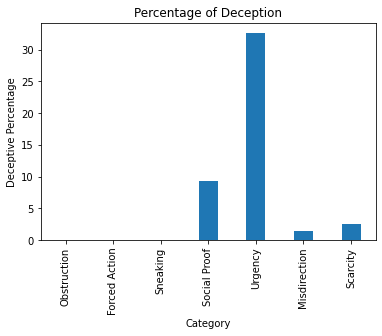

In [99]:
#graphs but gives percentage of deception, plus each indivual graph
cat = []
percentage_deceptive = []
for category in categories:
    deceptive_count, non_deceptive_count = analyze_category(category)
    cat.append(category)
    
    total = deceptive_count + non_deceptive_count
    if total != 0:
        percentage = (deceptive_count / total) * 100
    else:
        percentage = 0
    percentage_deceptive.append(percentage)

print(cat, percentage_deceptive)
plt.bar(cat, percentage_deceptive, width=0.4)
plt.ylabel("Deceptive Percentage")
plt.xticks(rotation='vertical')
plt.xlabel("Category")
plt.title("Percentage of Deception")
plt.show()
